# Supply Chain Data Analysis
Project By Kunal Kakara

#Questions
1.Make the visualization of the price of the product and the revenue generated by them
2.Analyze the sales by the product type
3.Find out the total revenue genertaed from shipping carriers
4.Analyze the revenue generated from the shipping carriers
5.Analyze the order quantity of each sku
6.Analyze the shipping cost of the carriers
7.Find out the cost distribution by transportation mode.
8.Analyzing the Defect Rate of the Product During Shipping


In [202]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default="plotly_white"
import warnings
warnings.filterwarnings('ignore')

In [203]:
df=pd.read_csv("supply_chain_data.csv")

In [204]:
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [205]:
df.shape

(100, 24)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [207]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [208]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [209]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print("-"*50)

Product type
['haircare' 'skincare' 'cosmetics']
--------------------------------------------------
SKU
['SKU0' 'SKU1' 'SKU2' 'SKU3' 'SKU4' 'SKU5' 'SKU6' 'SKU7' 'SKU8' 'SKU9'
 'SKU10' 'SKU11' 'SKU12' 'SKU13' 'SKU14' 'SKU15' 'SKU16' 'SKU17' 'SKU18'
 'SKU19' 'SKU20' 'SKU21' 'SKU22' 'SKU23' 'SKU24' 'SKU25' 'SKU26' 'SKU27'
 'SKU28' 'SKU29' 'SKU30' 'SKU31' 'SKU32' 'SKU33' 'SKU34' 'SKU35' 'SKU36'
 'SKU37' 'SKU38' 'SKU39' 'SKU40' 'SKU41' 'SKU42' 'SKU43' 'SKU44' 'SKU45'
 'SKU46' 'SKU47' 'SKU48' 'SKU49' 'SKU50' 'SKU51' 'SKU52' 'SKU53' 'SKU54'
 'SKU55' 'SKU56' 'SKU57' 'SKU58' 'SKU59' 'SKU60' 'SKU61' 'SKU62' 'SKU63'
 'SKU64' 'SKU65' 'SKU66' 'SKU67' 'SKU68' 'SKU69' 'SKU70' 'SKU71' 'SKU72'
 'SKU73' 'SKU74' 'SKU75' 'SKU76' 'SKU77' 'SKU78' 'SKU79' 'SKU80' 'SKU81'
 'SKU82' 'SKU83' 'SKU84' 'SKU85' 'SKU86' 'SKU87' 'SKU88' 'SKU89' 'SKU90'
 'SKU91' 'SKU92' 'SKU93' 'SKU94' 'SKU95' 'SKU96' 'SKU97' 'SKU98' 'SKU99']
--------------------------------------------------
Customer demographics
['Non-binary' 'Female

In [210]:
fig=px.scatter(df,x='Price',y='Revenue generated',color='Product type',hover_data=['Number of products sold'],trendline='ols')
fig.show()

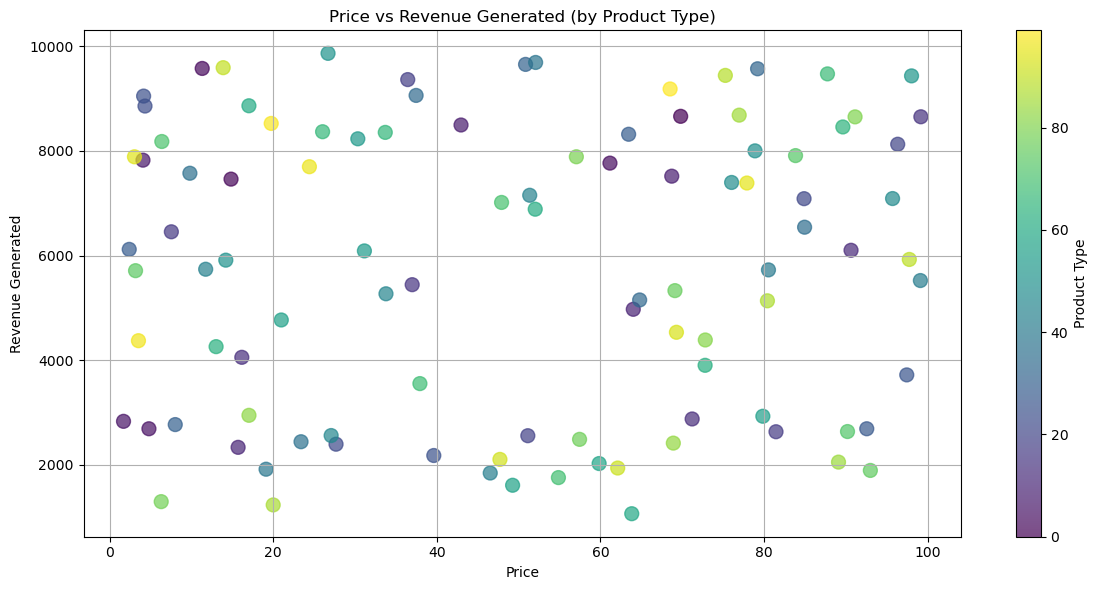

In [211]:
#same graph using matplot lib
import matplotlib.pyplot as plt

# Sample data (replace these with your actual data)
product_types = df['Product type']
prices = df['Price']
revenue_generated = df['Revenue generated']
# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(prices, revenue_generated, c=range(len(product_types)), cmap='viridis', s=100, alpha=0.7)

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Revenue Generated')
plt.title('Price vs Revenue Generated (by Product Type)')
plt.colorbar(label='Product Type')

# Annotating each point with product type
#for i, product in enumerate(product_types):
    #plt.annotate(product, (prices[i], revenue_generated[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Display the plot
plt.grid(True)
plt.tight_layout()

In [251]:
#Second Question
sales_data = df.groupby('Product type') ['Number of products sold'].sum().reset_index()
pie_chart = px.pie(sales_data, 
names='Product type',values='Number of products sold',
title='Sales by Product Type',
hover_data=['Number of products sold'],
hole=0.5,
color_discrete_sequence=px.colors.qualitative.Pastel)

pie_chart.update_traces (textposition='inside', textinfo='percent+label')

pie_chart.show()

In [213]:
#Third Question
revenue = df.groupby('Shipping carriers') ['Revenue generated'].sum().reset_index()
revenue

,Shipping carriers,Revenue generated
0,Carrier A,142629.994607
1,Carrier B,250094.646988
2,Carrier C,184880.177143


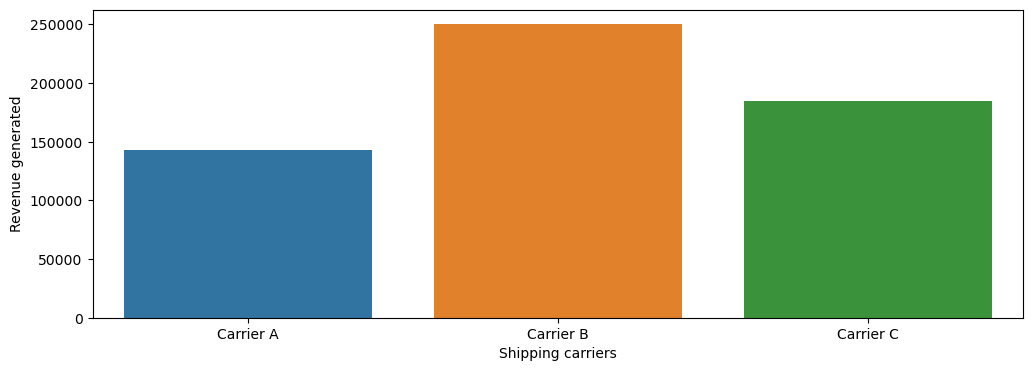

In [215]:
#Third Question
#Visualization using Matplot and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.barplot(x='Shipping carriers', y='Revenue generated', data=revenue)
plt.show()

In [226]:
#Visualization using plotly
fig = px.bar(revenue, x='Shipping carriers', y='Revenue generated', title='Revenue Generated by Shipping Carriers',color='Shipping carriers')
fig.show()

In [220]:
#Forth Question

Revenue_sku=px.line(df, x='SKU', y='Revenue generated', title='Revenue Generated by SkU')
Revenue_sku.show()

In [225]:
#Fifth Question
fig = px.bar(df, x='SKU', y='Order quantities', title='Order Quantity of Each SKU',color='SKU')
fig.show()

In [227]:
Shipping_Cost = df.groupby('Shipping carriers') ['Shipping costs'].sum().reset_index()
Shipping_Cost

,Shipping carriers,Shipping costs
0,Carrier A,155.537831
1,Carrier B,236.897620
2,Carrier C,162.379457


In [235]:
#Sixth Question
fig = px.bar(Shipping_Cost, x='Shipping carriers', y='Shipping costs', title='Shipping Carriers of Carriers',color="Shipping costs")
fig.show()

In [236]:
Cost_Distribution=df.groupby('Transportation modes')['Costs'].sum().reset_index()
Cost_Distribution

,Transportation modes,Costs
0,Air,14604.527498
1,Rail,15168.931559
2,Road,16048.193639
3,Sea,7102.925520


In [250]:
#Seventh Question
pie_chart = px.pie(Cost_Distribution, names='Transportation modes', values='Costs',
title='Cost Distribution',
hover_data=['Costs'],
hole=0.5,
color_discrete_sequence=px.colors.qualitative.Pastel)

pie_chart.update_traces (textposition='inside', textinfo='percent+label')

pie_chart.show()

In [264]:
defect = df.groupby('Product type') ['Defect rates'].mean().reset_index()
defect

,Product type,Defect rates
0,cosmetics,1.919287
1,haircare,2.483150
2,skincare,2.334681


In [265]:
fig = px.bar(defect, x='Product type', y='Defect rates', title='Defect Rate',color="Product type")
fig.show()